# **YOLO V9**

## **Getting Ready**

**Connect to T4 GPU on Google Colab and verify the connection runtime**

In [1]:
!nvidia-smi

Sun Mar 17 08:15:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch

# Check PyTorch GPU availability
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Is Available: {torch.cuda.is_available()}")
else:
    print("GPU is not available.")

GPU Name: Tesla T4
GPU Is Available: True


**Mount Google drive and create symbolic link**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Creating this symbolic link makes it easier to access your Google Drive files from the Colab notebook without having to type the full path /content/gdrive/My Drive/.
# After running this line, you can access your Google Drive root by referring to /mydrive in your code.
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [5]:
%cd /mydrive/Projects/yolov9/

/content/gdrive/My Drive/Projects/Yolo V9


**Clone the YOLO V9 model from the Official Repository**

In [6]:
# !git clone https://github.com/WongKinYiu/yolov9.git

In [7]:
%cd yolov9

/content/gdrive/My Drive/Projects/Yolo V9/yolov9


**Install Requirements**

In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## **YOLO V9 for Pre-trained dataset**

**Download yolov9 pretrained weights**

In [9]:
# !wget -P /mydrive/Projects/yolov9 https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

# !wget -P /mydrive/Projects/yolov9 https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

**Download a test image for inference**

In [10]:
# !wget -P /mydrive/Projects/yolov9 -q https://cdn.pixabay.com/photo/2020/04/18/12/23/woman-5059062_960_720.jpg

**Run the model for the test image**

If you get this error: AttributeError: 'list' object has no attribute 'device'
Then open utils/general.py file and go to line no 903 and write this prediction = prediction[0][1]

In [11]:
!python detect.py --weights /mydrive/Projects/yolov9/yolov9-e.pt --source /mydrive/Projects/yolov9/woman-5059062_960_720.jpg --device 0

detect: weights=['/mydrive/Projects/Yolo V9/yolov9-e.pt'], source=/mydrive/Projects/Yolo V9/woman-5059062_960_720.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/gdrive/MyDrive/Projects/Yolo': No such file or directory
YOLO 🚀 2024-3-11 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 839 layers, 68669632 parameters, 0 gradients, 241.4 GFLOPs
image 1/1 /content/gdrive/My Drive/Projects/Yolo V9/woman-5059062_960_720.jpg: 448x640 1 person, 3 cars, 1 motorcycle, 1 dog, 178.9ms
Speed: 0.6ms pre-process, 178.9ms inference, 762.1ms NMS per image at shape (1, 3, 640, 6

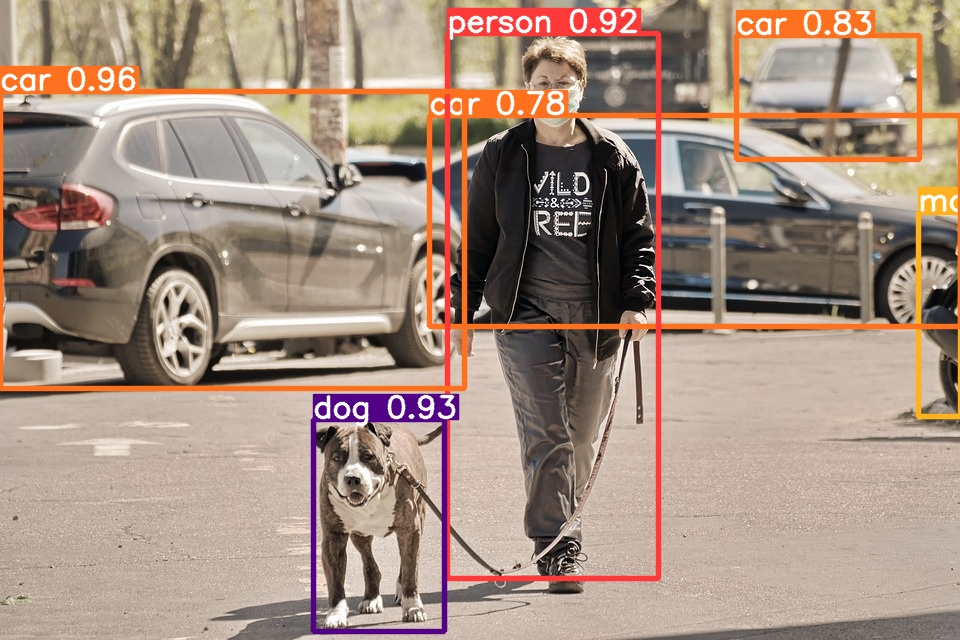

In [12]:
# Display the image
from IPython.display import Image

Image(filename=f"/mydrive/Projects/Yolo V9/yolov9/runs/detect/exp/woman-5059062_960_720.jpg", width=1000)

## **YOLO V9 for Custom Dataset**

Download Dataset: https://universe.roboflow.com/roboflow-100/furniture-ngpea
Paste the dataset folder in your drive

1- In yolov9 repo paste this data.yaml file <br>
2- Create a copy of models/detect/yolov9.yaml file and name it yolov9_custom.yaml.<br><br>
Open it and change the value of nc as per your custom model

In [13]:
#%cd yolov9

!python train_dual.py --workers 8 --batch 4  --img 640 --epochs 50 --data /mydrive/Projects/yolov9/yolov9/data.yaml --weights /mydrive/Projects/yolov9/yolov9-e.pt --device 0 --cfg /mydrive/Projects/yolov9/yolov9/models/detect/yolov9_custom.yaml --hyp /mydrive/Projects/yolov9/yolov9/data/hyps/hyp.scratch-high.yaml


2024-03-17 08:28:31.789902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 08:28:31.790057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 08:28:31.930477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 08:28:33.987154: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/mydrive/Projects/yolov9/yolov9-e.pt, cfg=/mydrive/Projects/yolov9/yolov9/models/detect/yolov9_custom.yaml, data=/mydrive/Projects/yolov9/yolov9/data.yaml, hyp=/mydrive/Projects/yolov9/yolov9/data/hyps/hyp.scratch-high.ya

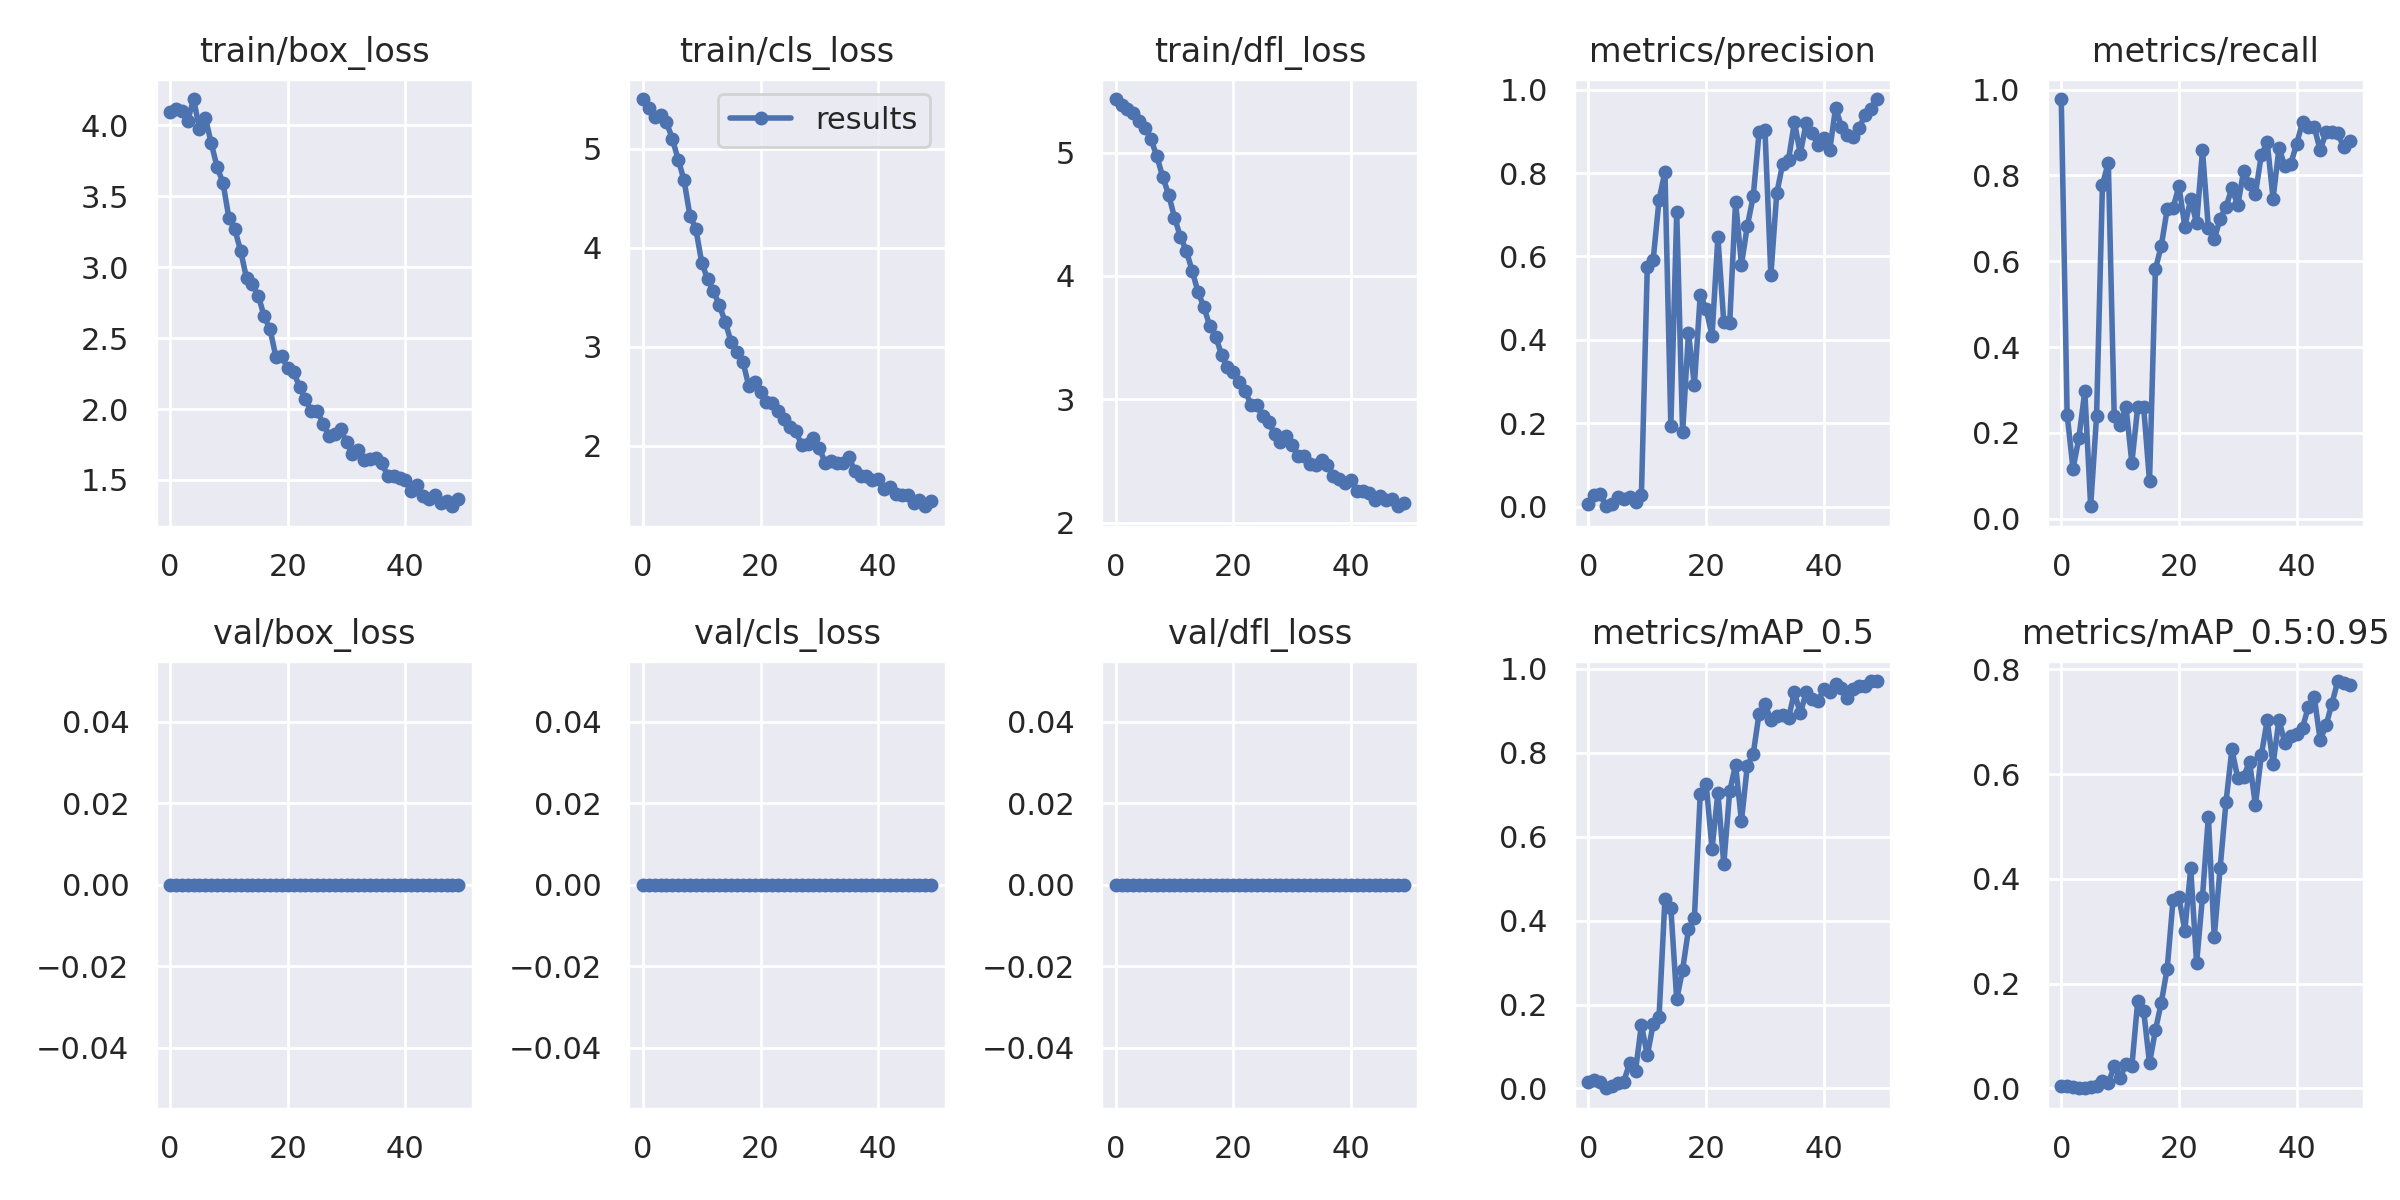

In [14]:
from IPython.display import Image
Image(filename="/mydrive/Projects/yolov9/yolov9/runs/train/exp/results.png", width=600)


**Inference with Custom Model**

In [15]:
!python detect.py --img 1280 --conf 0.1 --device 0 --weights /mydrive/Projects/yolov9/yolov9/runs/train/exp/weights/best.pt --source /mydrive/Projects/yolov9/furniture.jpg

detect: weights=['/mydrive/Projects/yolov9/yolov9/runs/train/exp/weights/best.pt'], source=/mydrive/Projects/yolov9/furniture.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/gdrive/My': No such file or directory
YOLO 🚀 2024-3-11 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9_custom summary: 580 layers, 60500530 parameters, 0 gradients, 263.9 GFLOPs
image 1/1 /content/gdrive/My Drive/Projects/yolov9/furniture.jpg: 864x1280 6 Chairs, 11 Sofas, 2 Tables, 177.1ms
Speed: 1.2ms pre-process, 177.1ms inference, 565.3ms NMS per image at shape (1, 3, 1280, 1280)
Results saved

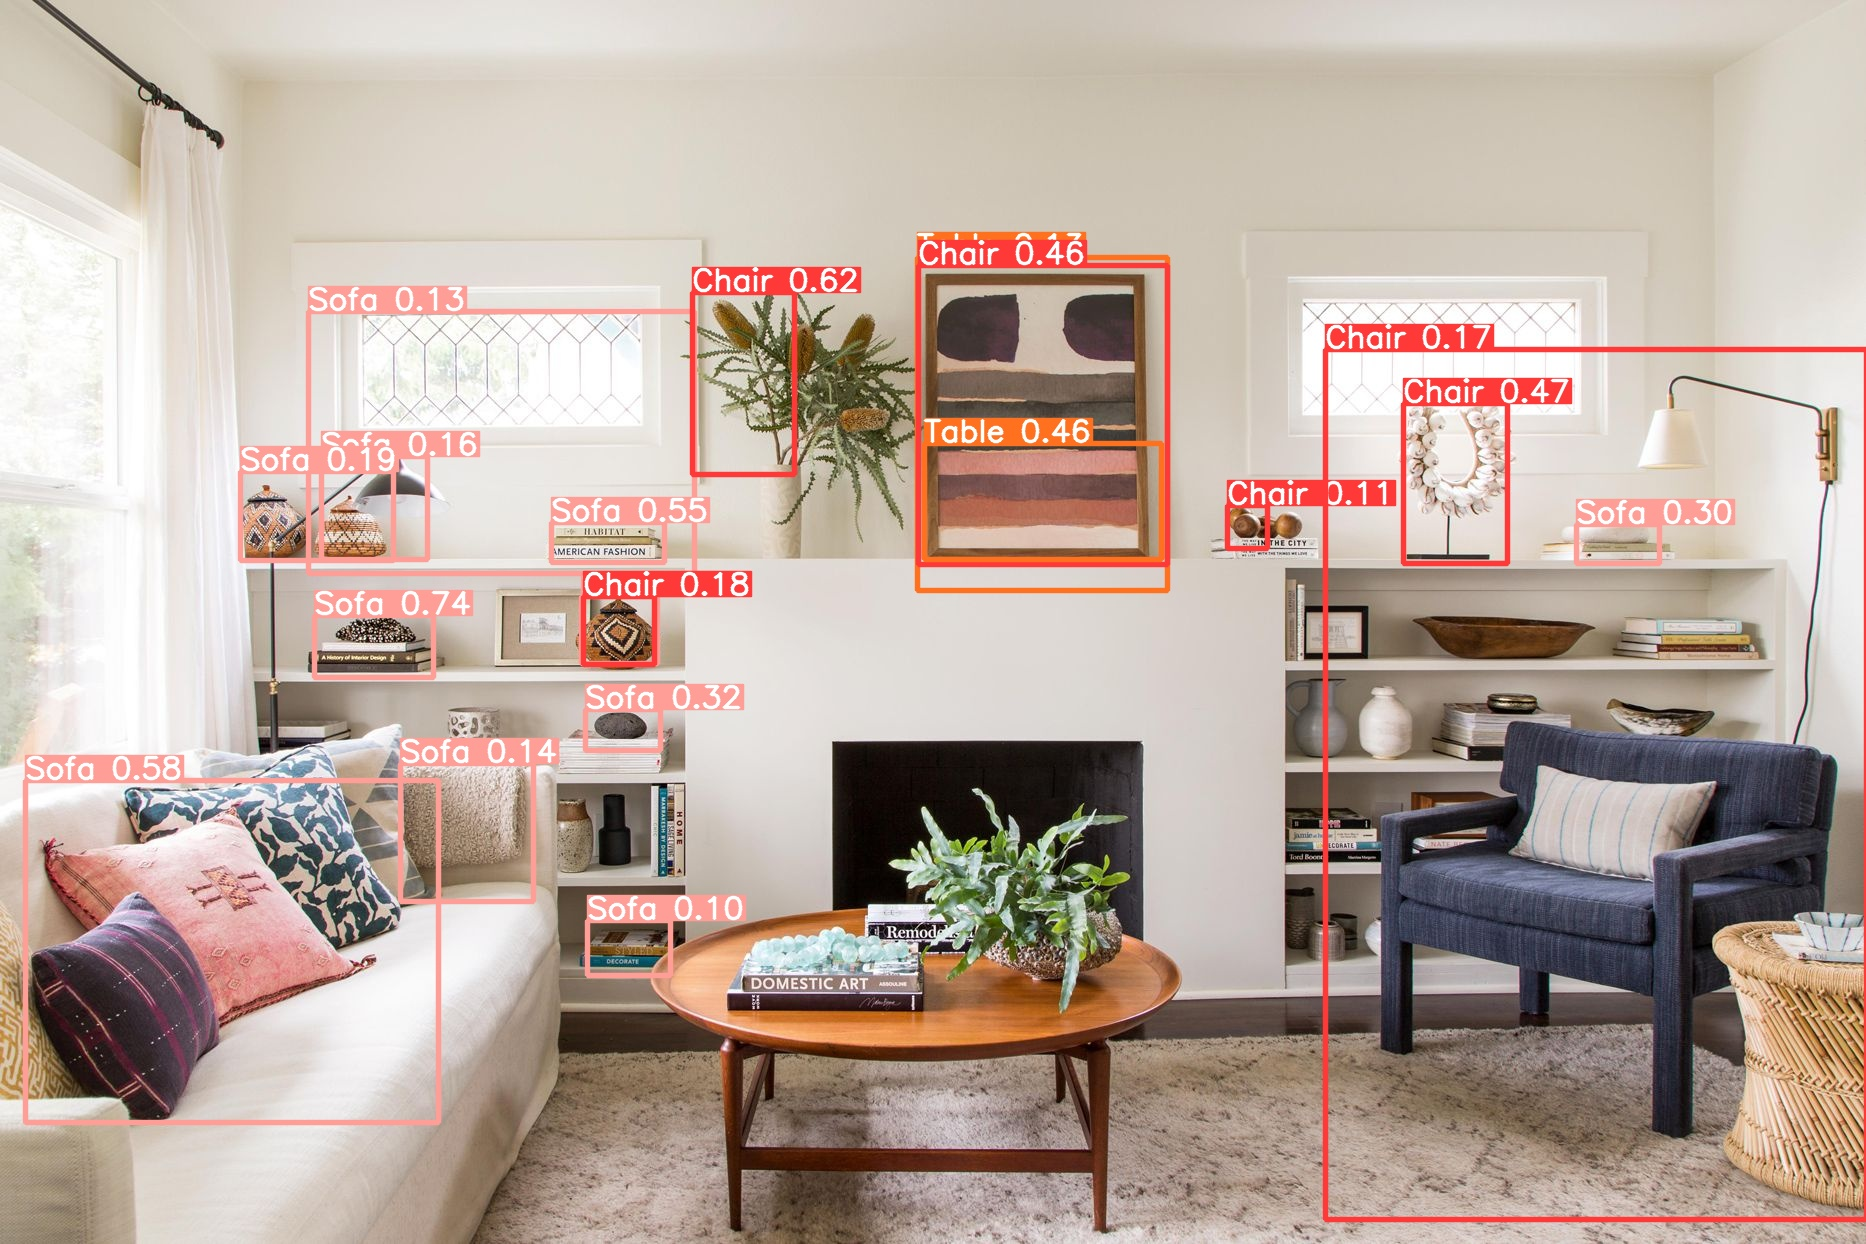

In [16]:
from IPython.display import Image
Image(filename="/mydrive/Projects/yolov9/yolov9/runs/detect/exp3/furniture.jpg", width=600)